# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [4]:
df.shape

(900, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [7]:
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [14]:
unique = df['Class'].unique()
print(unique)


['Kecimen' 'Besni']


In [15]:
df_1= df.copy()
df_1

In [16]:
# 'Kecime' değerlerini 1'e, 'Besni' değerlerini 0'a dönüştürme
df_1['Class'] = df_1['Class'].replace({'Kecimen': 1, 'Besni': 0})

print(df_1)


      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524          442.246          253.291         0.820       90546   
1    75166          406.691          243.032         0.802       78789   
2    90856          442.267          266.328         0.798       93717   
3    45928          286.541          208.760         0.685       47336   
4    79408          352.191          290.828         0.564       81463   
..     ...              ...              ...           ...         ...   
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter  Class  
0     0.759   1184.040      1  
1     0.684   1121.786      1  
2     0.638   1

In [8]:
df.Class.value_counts(normalize = True)

Class
Kecimen   0.500
Besni     0.500
Name: proportion, dtype: float64

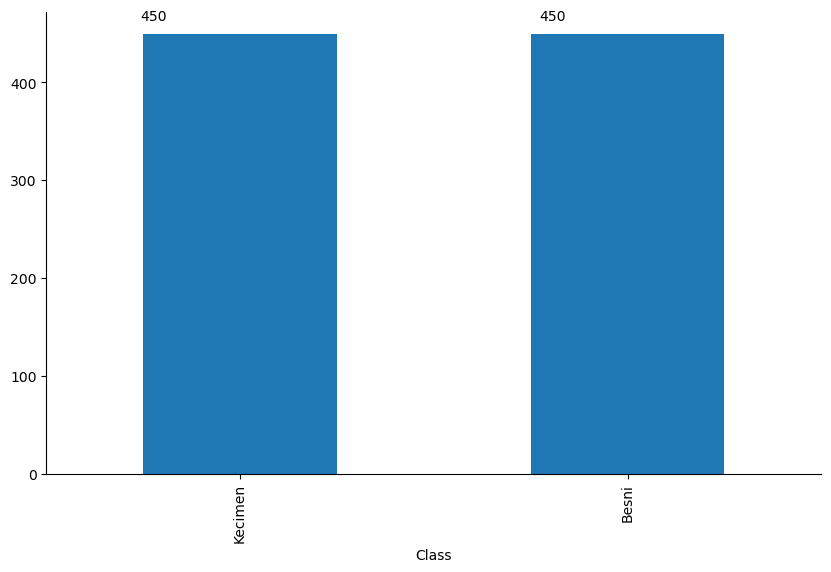

In [9]:
ax = df.Class.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))
    
# ax.bar_label(ax.containers[0]);

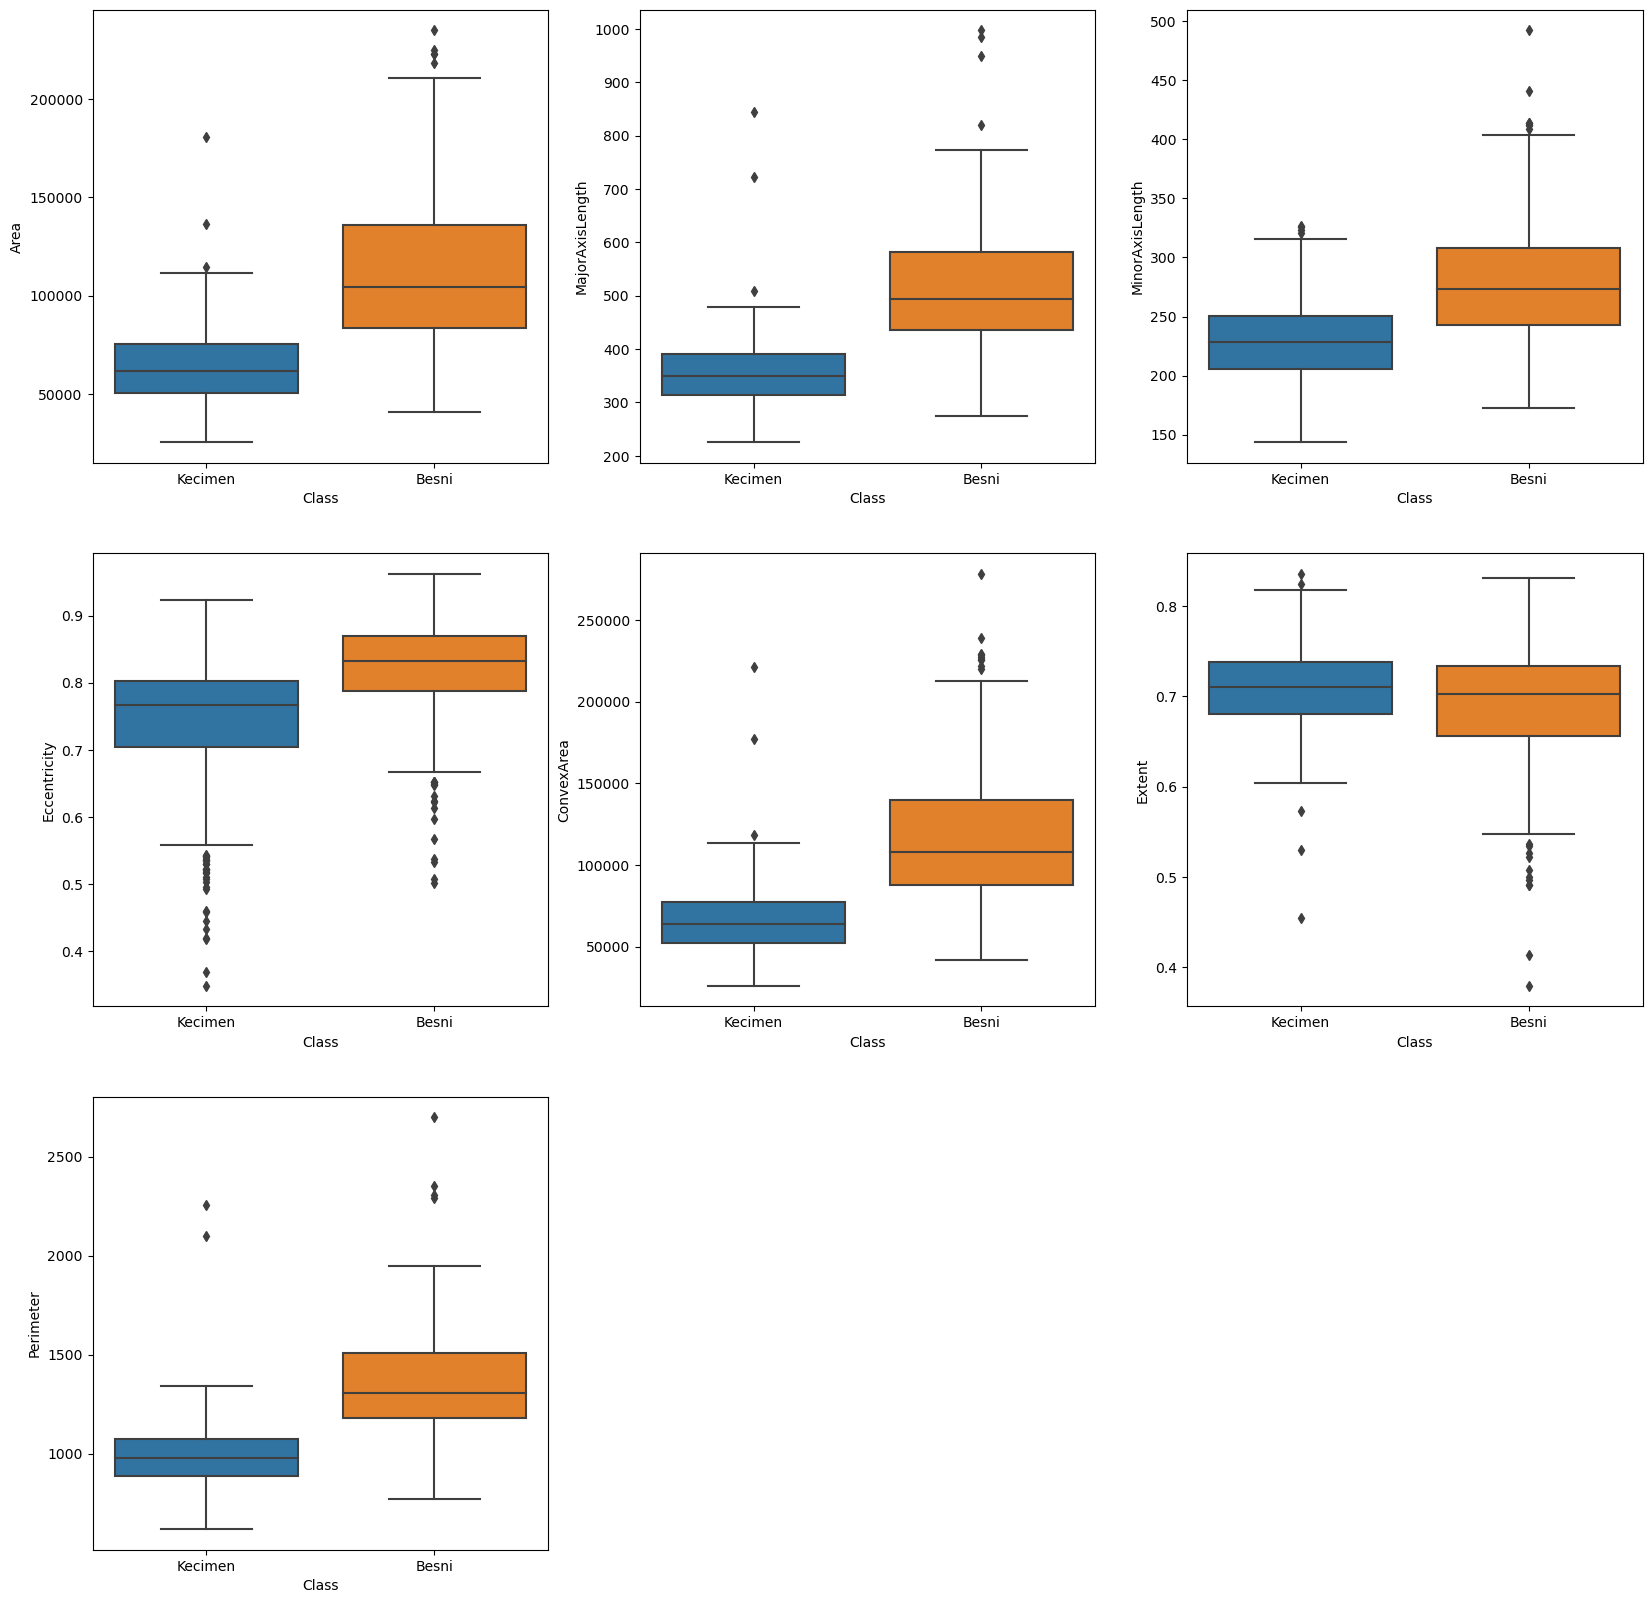

In [10]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

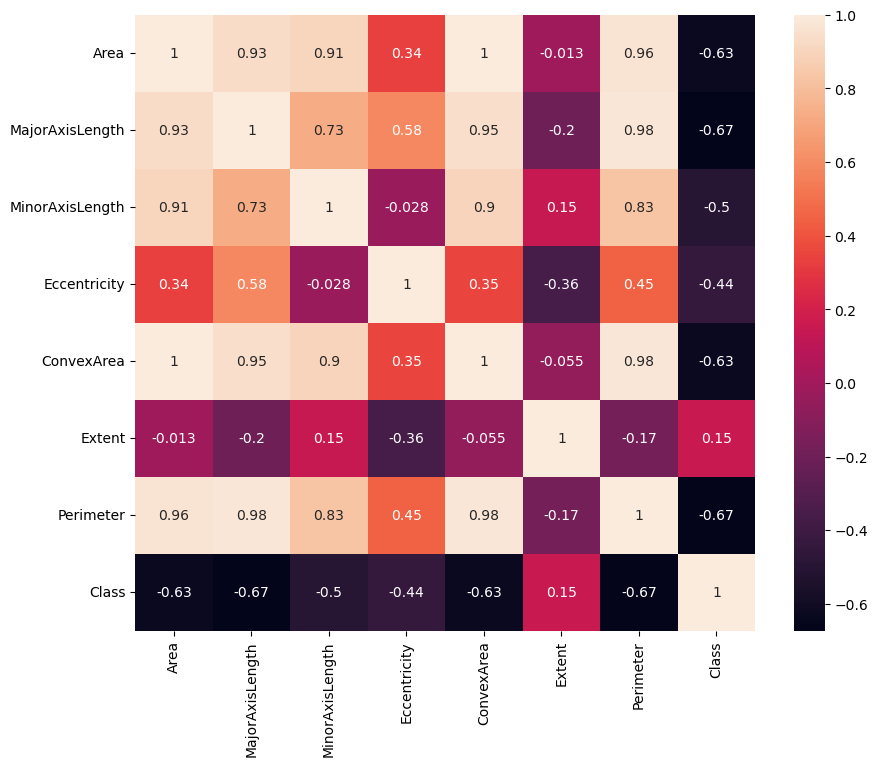

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(), annot=True)
plt.show()

In [18]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

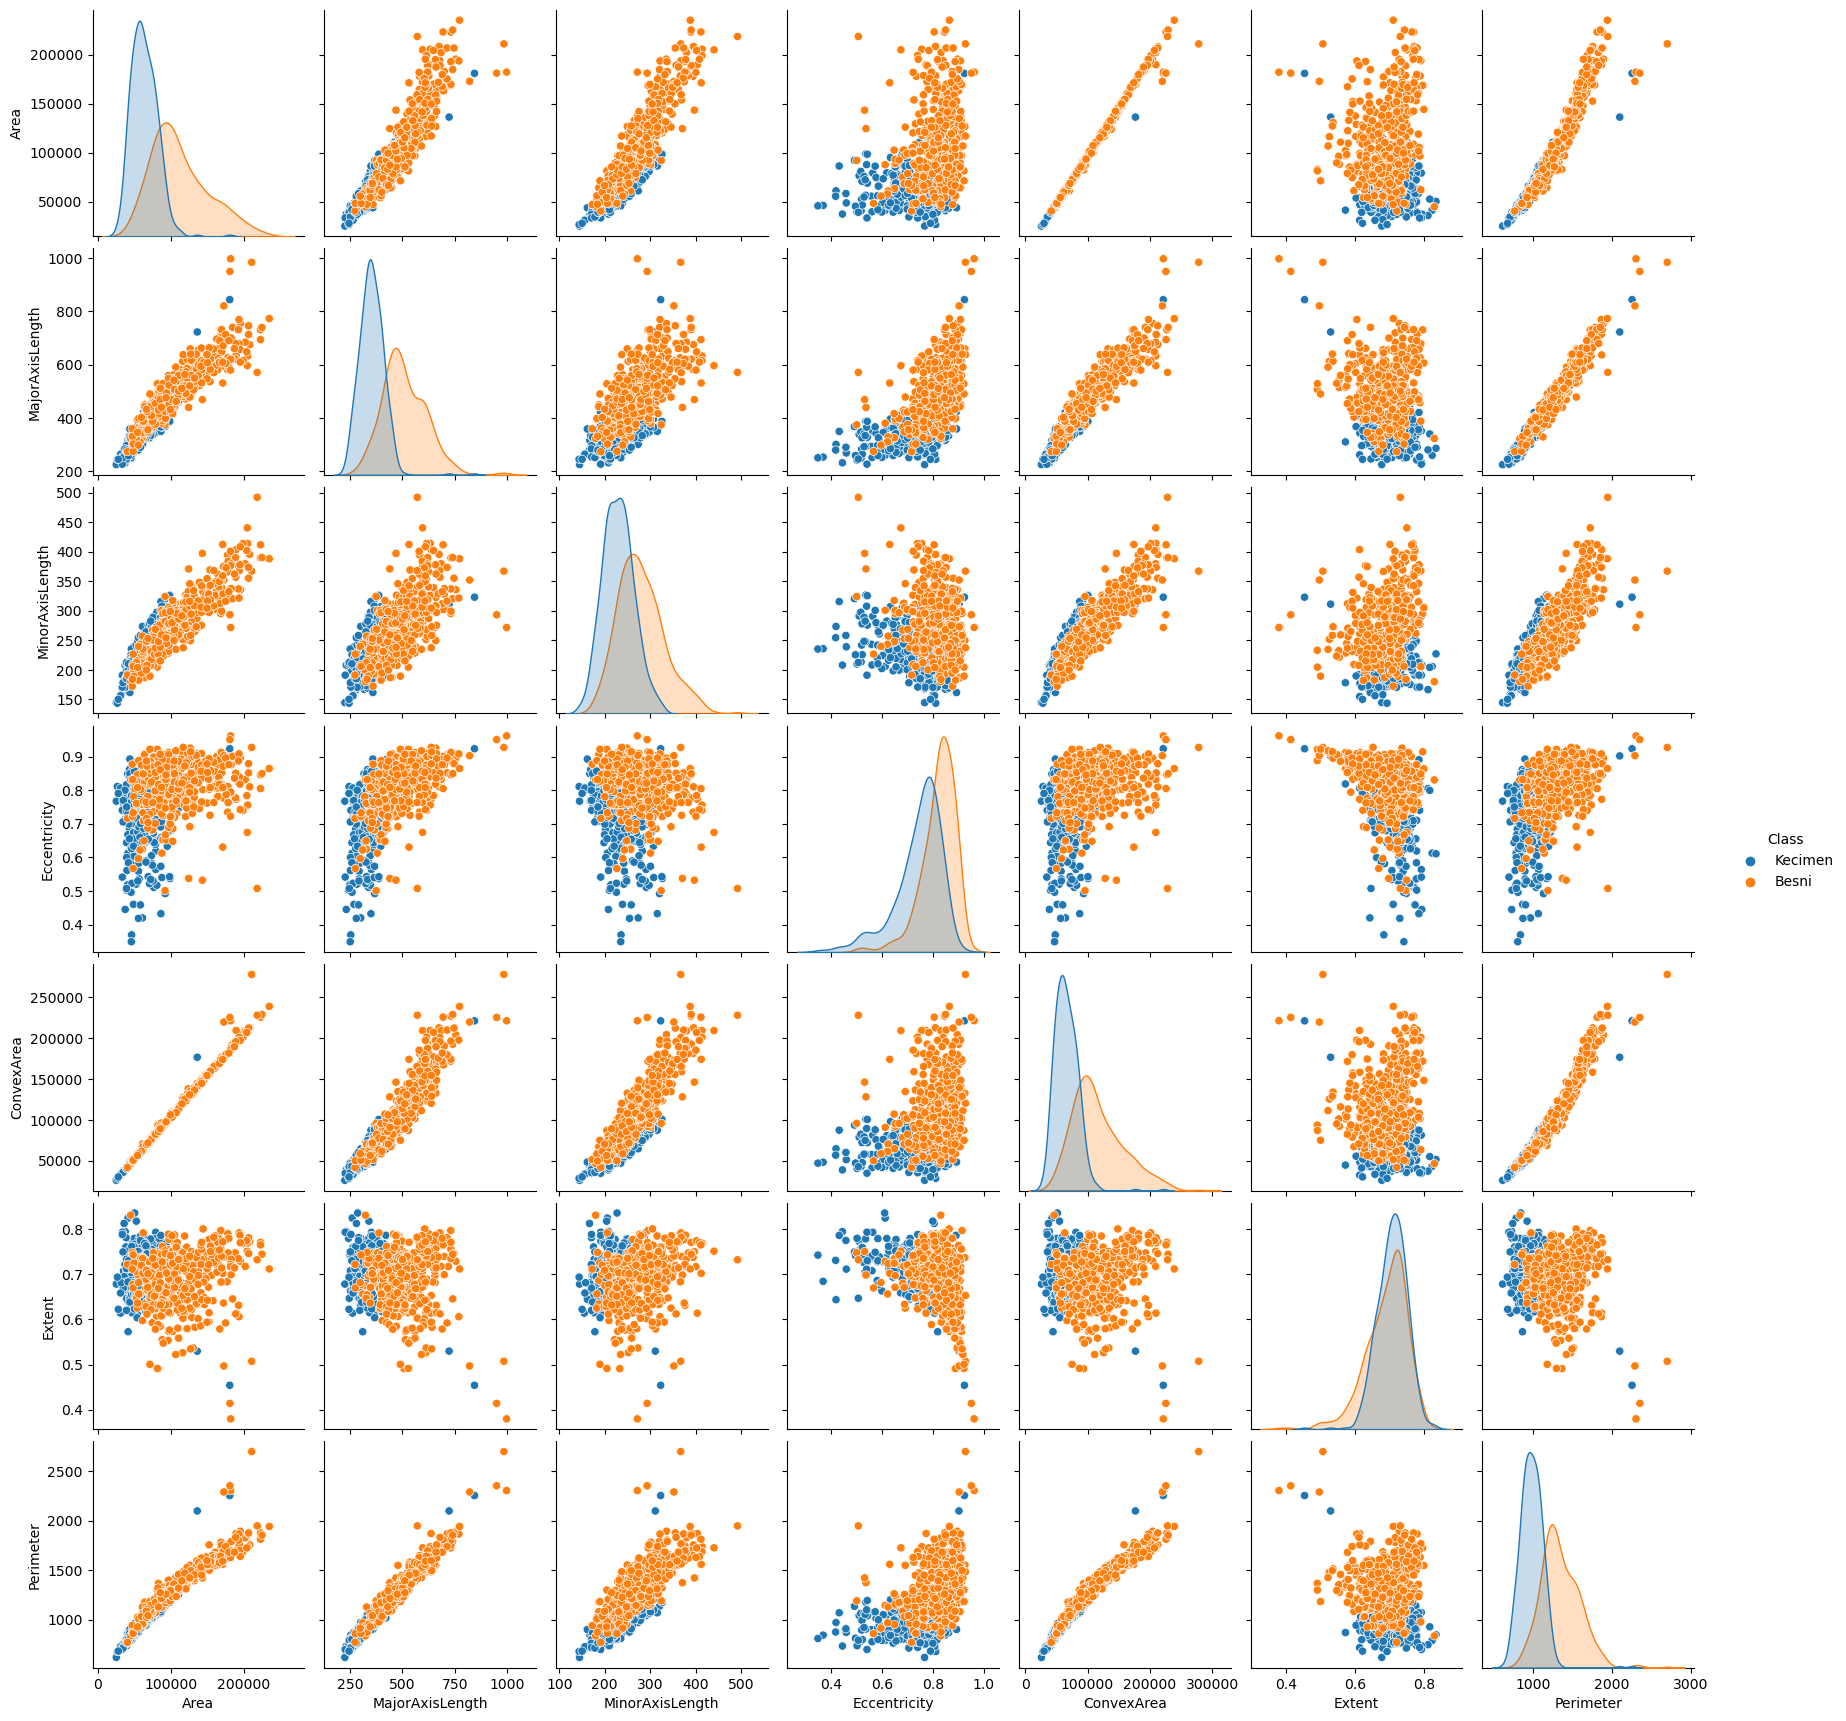

In [19]:
sns.pairplot(df, hue = "Class");

## Train | Test Split and Scaling
## Logistic Regression
## Model Performance

In [25]:
X= df.drop(columns="Class")
y= df.Class

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
y_pred = log_model.predict(X_test_scaled)

In [34]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [35]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
430,57838,350.285,214.802,0.790,59449,0.674,939.149,Kecimen,Kecimen,0.848
367,56518,319.192,230.710,0.691,58879,0.719,916.396,Kecimen,Kecimen,0.936
843,96920,447.595,277.436,0.785,100285,0.687,1229.910,Besni,Besni,0.256
165,59970,353.002,219.683,0.783,61834,0.756,978.631,Kecimen,Kecimen,0.849
96,79661,360.073,282.739,0.619,81032,0.779,1045.658,Kecimen,Kecimen,0.875
78,76984,425.048,233.973,0.835,78641,0.759,1091.754,Kecimen,Kecimen,0.540
428,48093,329.936,187.042,0.824,49367,0.745,858.386,Kecimen,Kecimen,0.924
82,58650,346.339,219.684,0.773,62380,0.660,991.612,Kecimen,Kecimen,0.802
120,69302,354.964,254.453,0.697,71843,0.701,1051.020,Kecimen,Kecimen,0.801
462,126781,659.443,249.545,0.926,132802,0.737,1552.540,Besni,Besni,0.004


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [38]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[308  56]
 [ 39 317]]
              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       364
     Kecimen       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.010,0.011,0.847,0.850,0.847,0.847
2,0.009,0.012,0.875,0.882,0.875,0.874
3,0.006,0.016,0.819,0.820,0.819,0.819
4,0.009,0.013,0.944,0.946,0.944,0.944
5,0.008,0.012,0.861,0.866,0.861,0.861
6,0.006,0.011,0.889,0.890,0.889,0.889
7,0.007,0.011,0.778,0.782,0.778,0.777
8,0.002,0.000,0.833,0.838,0.833,0.833
9,0.016,0.017,0.931,0.931,0.931,0.931
10,0.000,0.017,0.903,0.911,0.903,0.902


In [41]:
df_scores.mean()[2:] # datanın cv sonucu gerçek değerleri. test ve trainle karşılaştırıldığında uyumlu olduğu görülüyor.

test_accuracy             0.868
test_precision_weighted   0.872
test_recall_weighted      0.868
test_f1_weighted          0.868
dtype: float64

In [58]:
import sklearn
print(sklearn.__version__)


1.4.0


In [59]:
import pkg_resources
print(pkg_resources.get_distribution("scikit-learn").version)


1.4.0


In [61]:
from sklearn.metrics import roc_curve


## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [64]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [68]:
roc_curve(log_model, X_test_scaled);
plt.show() # balans datalarda

InvalidParameterError: The 'y_true' parameter of roc_curve must be an array-like. Got LogisticRegression() instead.

In [66]:
precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show() #unbalance datalarda 

TypeError: too many positional arguments

# Conclusion 